<a href="https://colab.research.google.com/github/yourmakerz/loan_check/blob/main/Loan_final_project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.listdir("/content/drive/MyDrive/ColabNotebooks/Ontario_Tech/Data_set/Loan_Predict")


['.ipynb_checkpoints', 'Loan_predict.csv']

In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [5]:
# Advanced ML
import xgboost as xgb
import shap

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
# Load dataset
file_path_loan_predict = "/content/drive/MyDrive/ColabNotebooks/Ontario_Tech/Data_set/Loan_Predict/Loan_predict.csv"
df_loan_predict = pd.read_csv(file_path_loan_predict)

# Basic checks
print("Shape of dataset:", df_loan_predict.shape)
print("\nSample rows:")
print(df_loan_predict.head())

print("\nMissing values:")
print(df_loan_predict.isnull().sum())

Shape of dataset: (1000000, 51)

Sample rows:
   CreditScore  AnnualIncome  LoanAmount  LoanDuration  Age EmploymentStatus  \
0          402         63295       18830            13   29    Self-Employed   
1          735         55936       23729             1   42    Self-Employed   
2          570         62547       19660             7   54    Self-Employed   
3          406         46129       21674            23   25    Self-Employed   
4          371         57725       12189            26   42         Employed   

  MaritalStatus  NumberOfDependents EducationLevel HomeOwnershipStatus  ...  \
0       Widowed                   2      Doctorate               Other  ...   
1      Divorced                   3         Master                 Own  ...   
2        Single                   3      Doctorate            Mortgage  ...   
3      Divorced                   3    High School               Other  ...   
4       Widowed                   4         Master                 Own  ...   

In [7]:
print("\nColumns in dataset:")
print(df_loan_predict.columns.tolist())



Columns in dataset:
['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age', 'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents', 'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'InvestmentAccountBalance', 'RetirementAccountBalance', 'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth', 'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments', 'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance', 'UtilityBillsPaymentHistory', 'HealthInsuranceStatus', 'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings', 'AnnualBonuses', 'AnnualExpenses', 'MonthlyHousingCosts', 'MonthlyTransportationCosts', 'Mo

In [8]:
print("\n--- Dataset Info ---")
print(df_loan_predict.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CreditScore                 1000000 non-null  int64  
 1   AnnualIncome                1000000 non-null  int64  
 2   LoanAmount                  1000000 non-null  int64  
 3   LoanDuration                1000000 non-null  int64  
 4   Age                         1000000 non-null  int64  
 5   EmploymentStatus            1000000 non-null  object 
 6   MaritalStatus               1000000 non-null  object 
 7   NumberOfDependents          1000000 non-null  int64  
 8   EducationLevel              1000000 non-null  object 
 9   HomeOwnershipStatus         1000000 non-null  object 
 10  MonthlyDebtPayments         1000000 non-null  int64  
 11  CreditCardUtilizationRate   1000000 non-null  float64
 12  NumberOfOpenCreditLines     1000000

Exploring feature importance

In [9]:
from xgboost import XGBClassifier

In [10]:
# Define features and target
X = df_loan_predict.drop('LoanApproved', axis=1)
y = df_loan_predict['LoanApproved']

In [11]:
# Encode categorical features if not already done
X = pd.get_dummies(X, drop_first=True)

# Train XGBoost for feature importance
xgb_model = XGBClassifier()
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

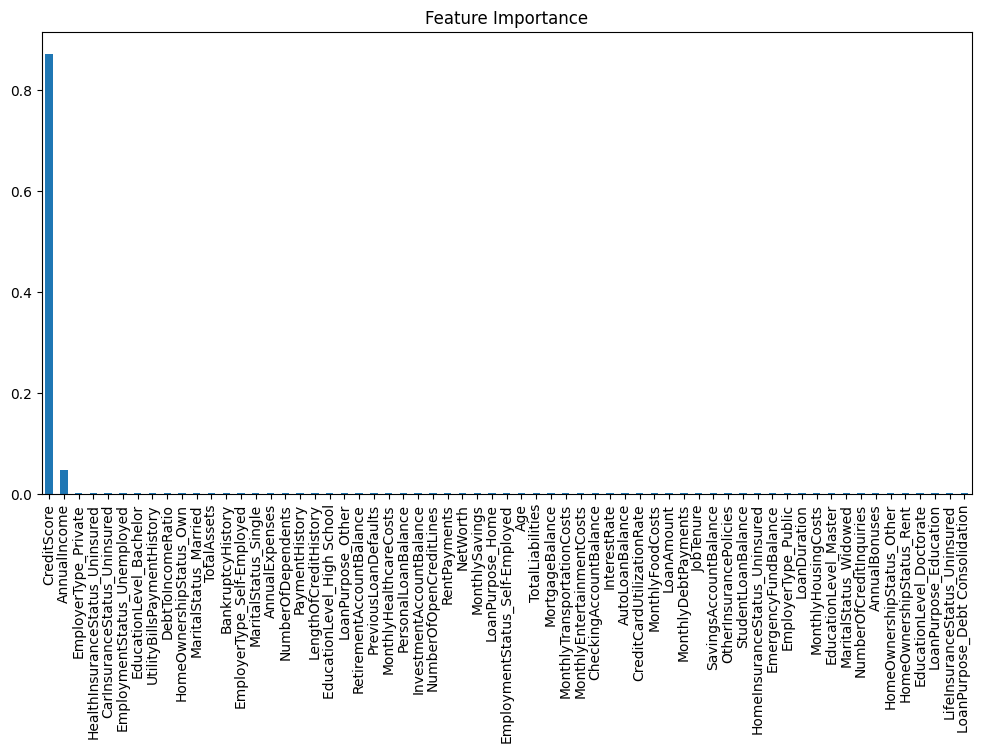

In [12]:
# Plot feature importance
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importance")
plt.show()

In [13]:
from sklearn.feature_selection import mutual_info_classif


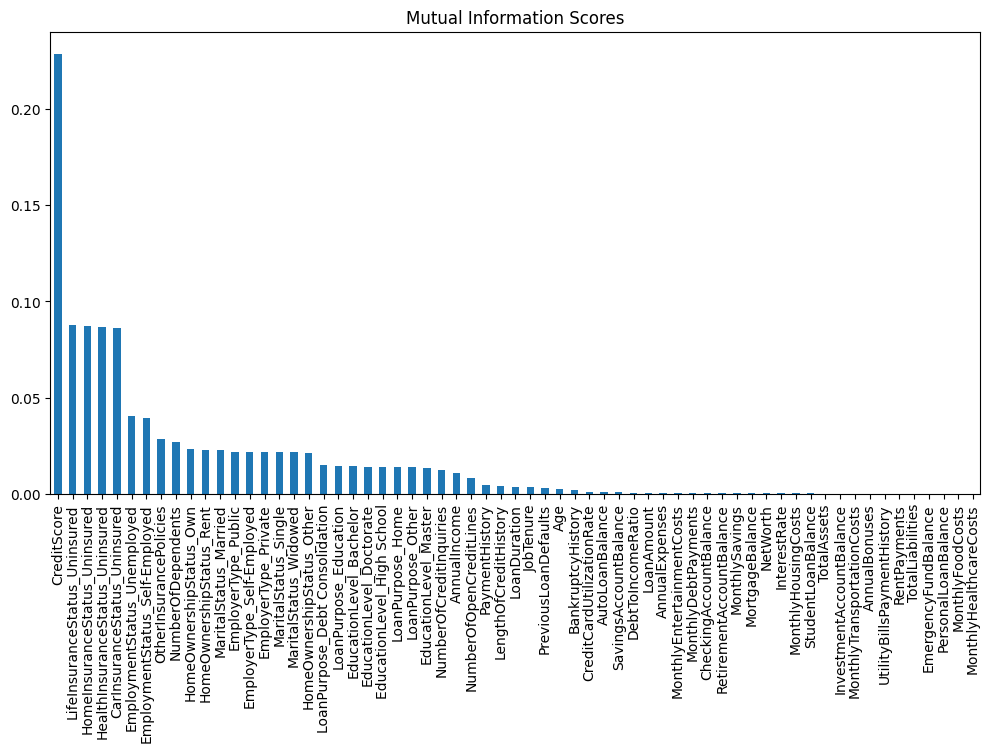

In [14]:
# Calculate mutual information for feature-target relationship
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot MI scores
mi_scores_series.plot(kind='bar', figsize=(12, 6), title="Mutual Information Scores")
plt.show()

In [15]:
print("\n--- Missing Values ---")
print(df_loan_predict.isnull().sum().sort_values(ascending=False).head(10))  # Top 10 features with missing values


--- Missing Values ---
CreditScore            0
AnnualIncome           0
LoanAmount             0
LoanDuration           0
Age                    0
EmploymentStatus       0
MaritalStatus          0
NumberOfDependents     0
EducationLevel         0
HomeOwnershipStatus    0
dtype: int64


In [16]:
print("\n--- Descriptive Stats ---")
print(df_loan_predict.describe())



--- Descriptive Stats ---
          CreditScore    AnnualIncome      LoanAmount    LoanDuration  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean       574.559628    59971.227298    20001.643495       15.014402   
std        158.774753    15013.989902     5000.662270        8.363599   
min        300.000000    -9666.000000    -4900.000000        1.000000   
25%        437.000000    49855.000000    16630.000000        8.000000   
50%        574.000000    59973.000000    20006.000000       15.000000   
75%        712.000000    70080.000000    23376.000000       22.000000   
max        849.000000   132414.000000    44921.000000       29.000000   

                  Age  NumberOfDependents  MonthlyDebtPayments  \
count  1000000.000000      1000000.000000       1000000.000000   
mean        43.497517            1.999334           499.712597   
std         15.005348            1.415219           199.942646   
min         18.000000            0.000000          

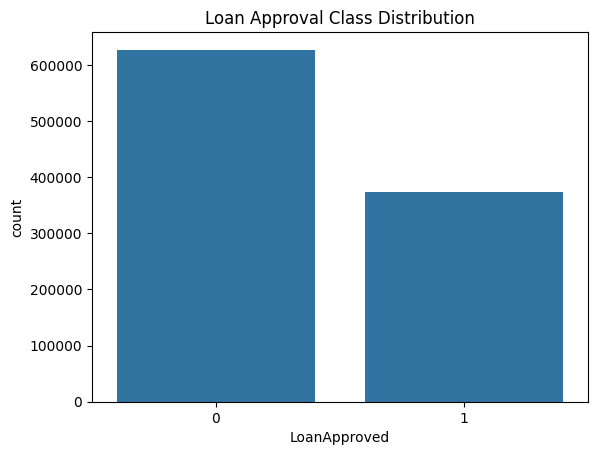

LoanApproved
0    0.626831
1    0.373169
Name: proportion, dtype: float64


In [17]:
sns.countplot(x='LoanApproved', data=df_loan_predict)
plt.title("Loan Approval Class Distribution")
plt.show()

print(df_loan_predict['LoanApproved'].value_counts(normalize=True))


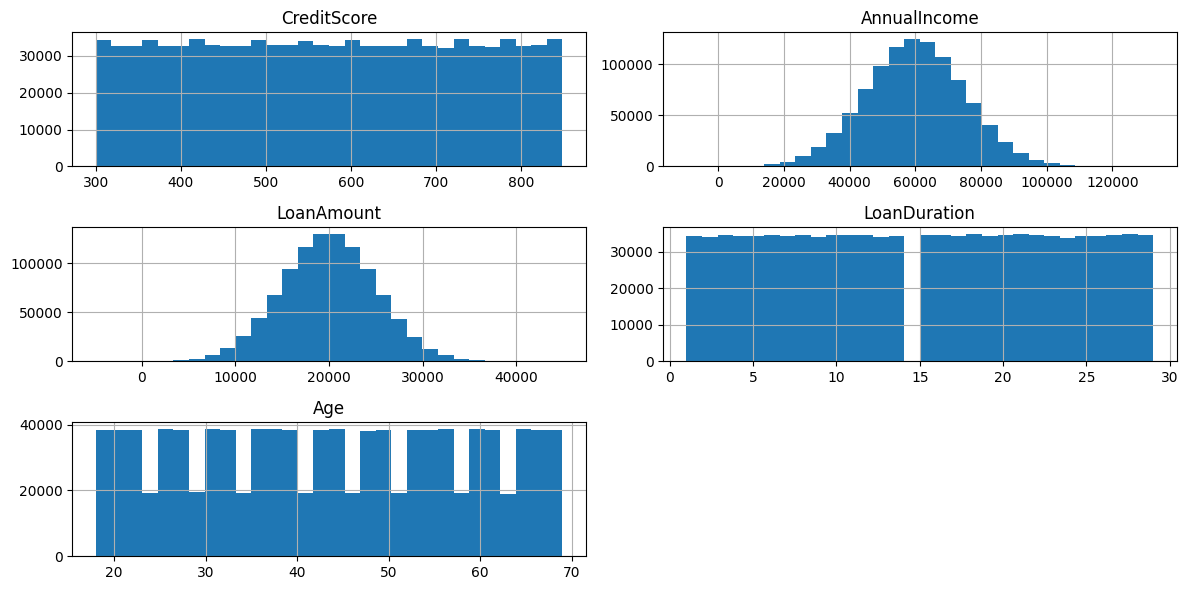

In [18]:
# Plot distribution of numerical features
numerical_cols = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age']
df_loan_predict[numerical_cols].hist(figsize=(12, 6), bins=30)
plt.tight_layout()
plt.show()


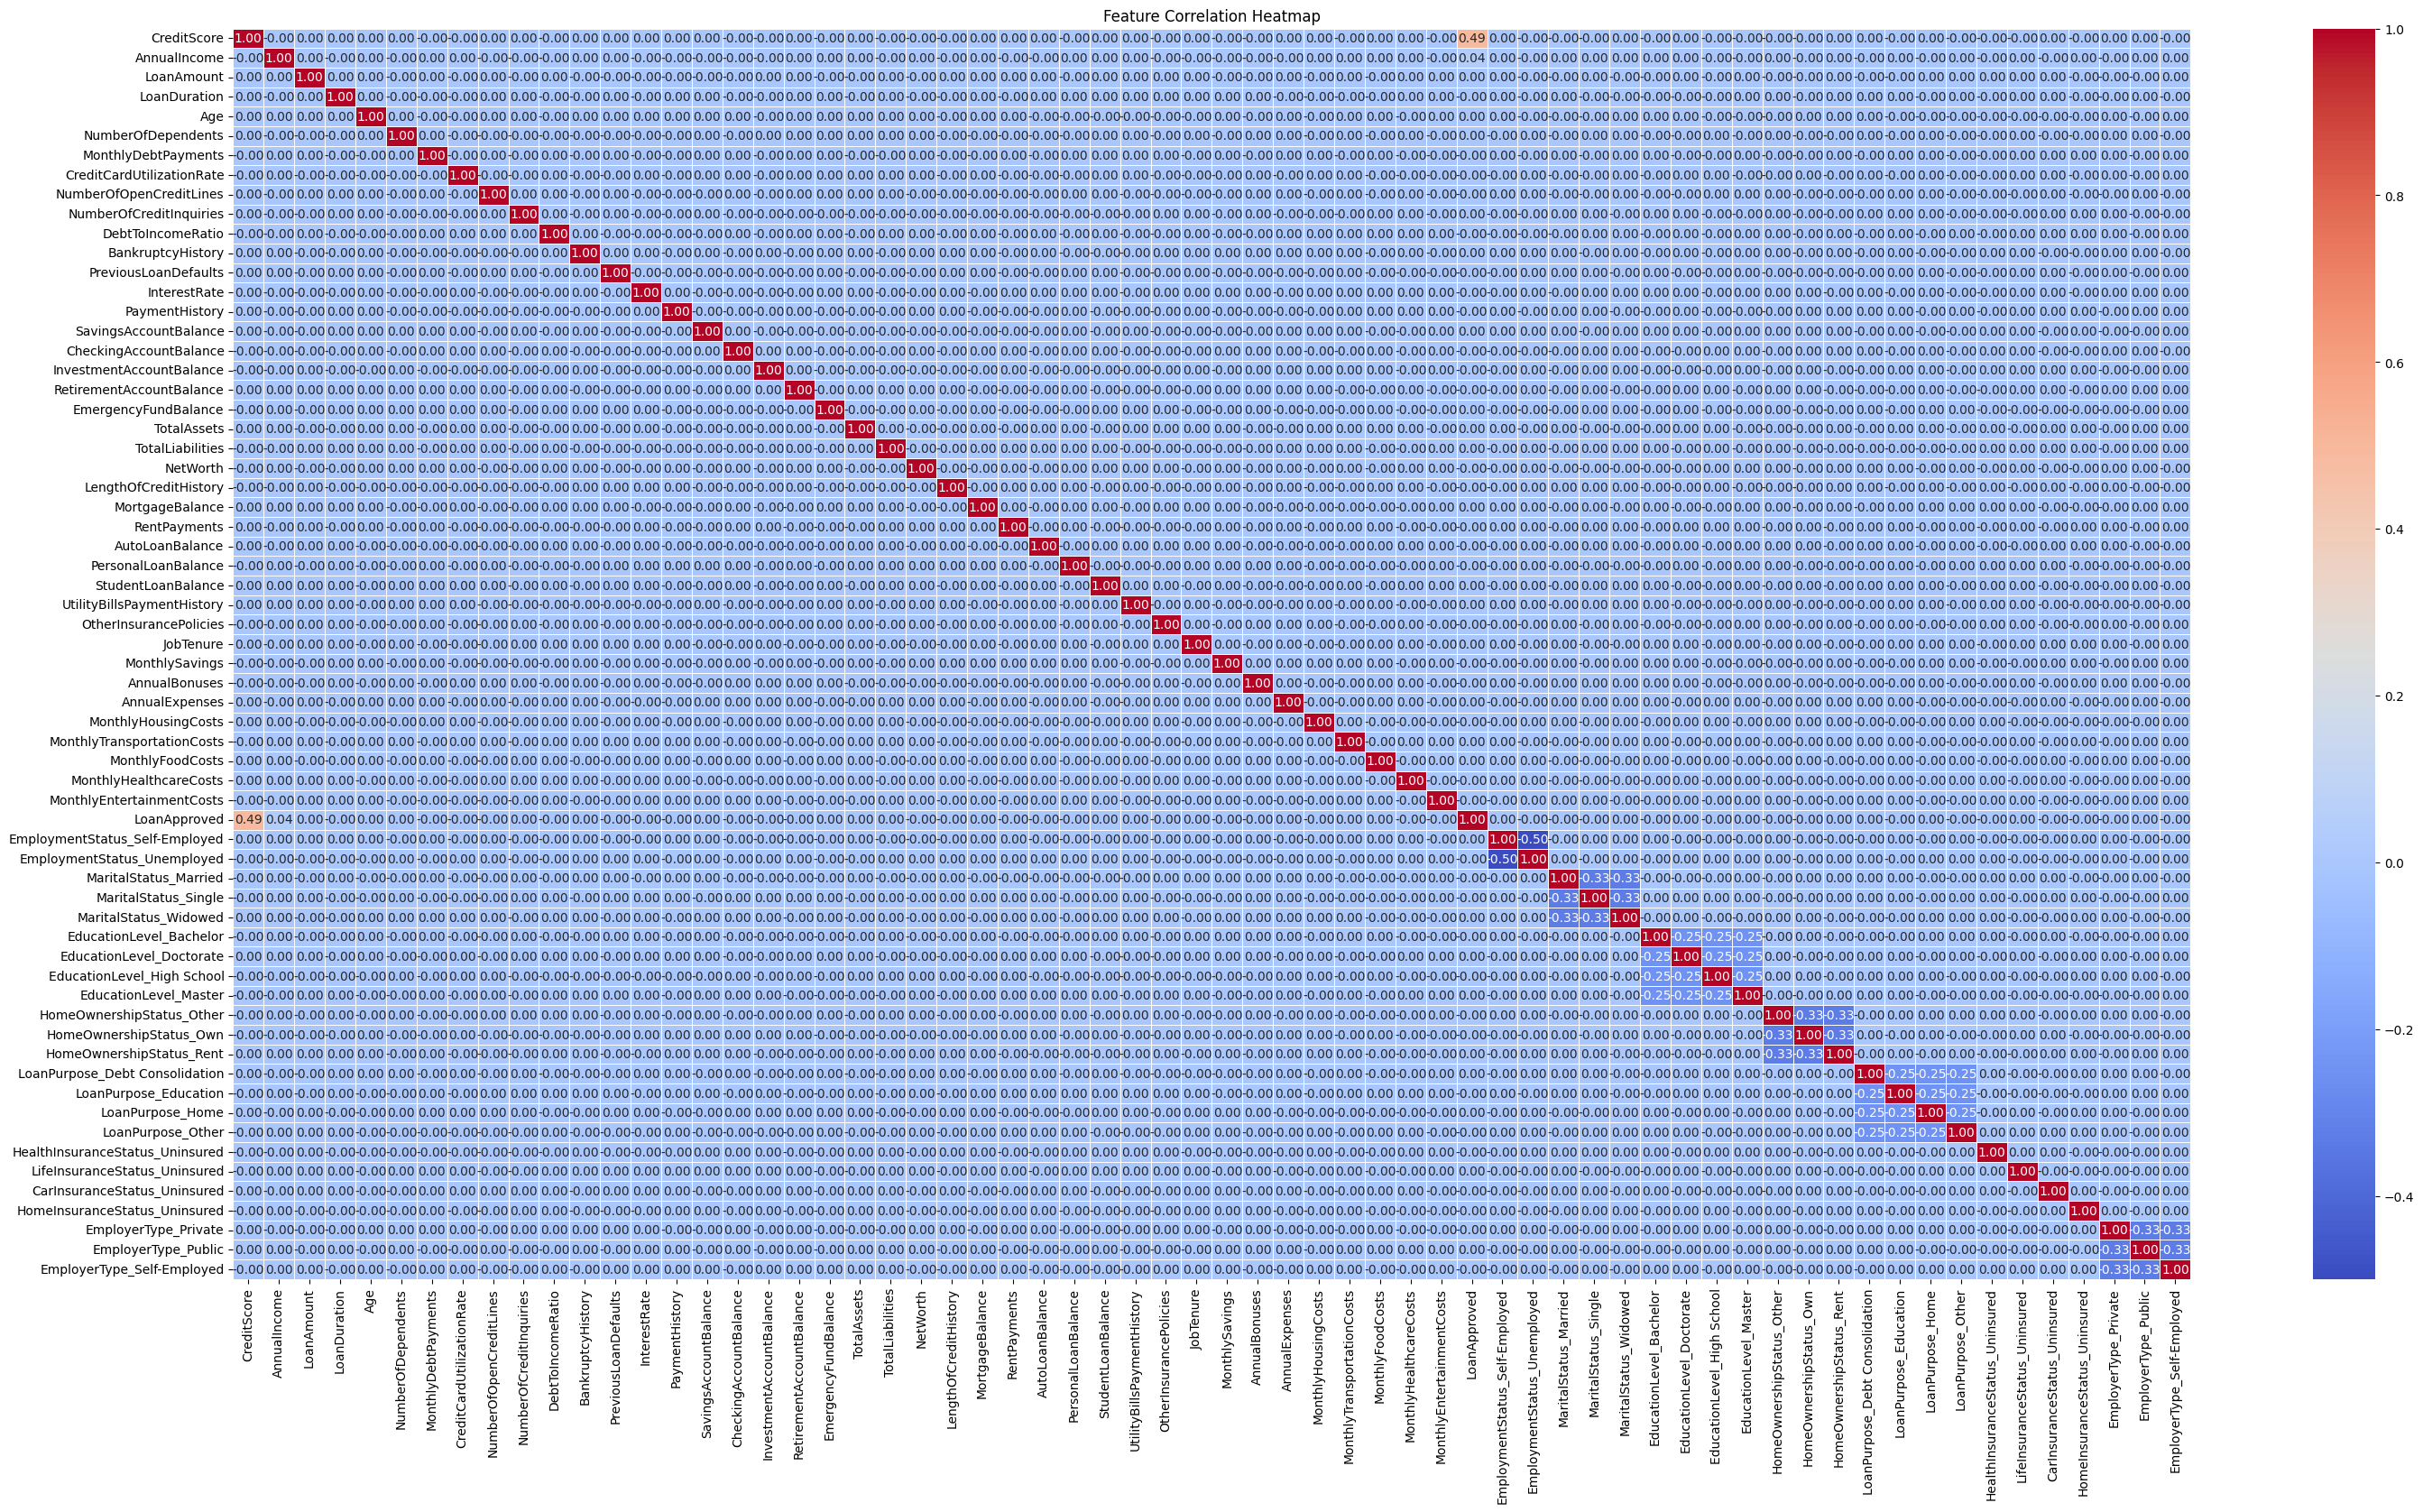

In [19]:
# One-hot encode categorical columns
df_loan_encoded = pd.get_dummies(df_loan_predict, drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_loan_encoded.corr()

# Plot heatmap
plt.figure(figsize=(35, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
## Encode Categorical Columns (for ML)

# List of categorical columns
categorical_cols = df_loan_predict.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# Encode them using LabelEncoder
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_loan_predict[col] = le.fit_transform(df_loan_predict[col])
    encoders[col] = le



Categorical Columns: ['EmploymentStatus', 'MaritalStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose', 'HealthInsuranceStatus', 'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 'EmployerType']


Eligibility Prediction (Neural Net Classifier)

Repayment Risk (XGBoost Classifier)

Fraud Detection (Autoencoder)

In [21]:
## Define Feature Groups for Each Model
eligibility_features = [
    'CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration',
    'Age', 'EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus',
    'DebtToIncomeRatio', 'LoanPurpose', 'JobTenure', 'MonthlyDebtPayments'
]

In [22]:
df_eligibility = df_loan_predict[eligibility_features + ['LoanApproved']].copy()


In [23]:
# Label encode categorical columns
eligibility_encoders = {}
for col in ['EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose']:
    le = LabelEncoder()
    df_eligibility[col] = le.fit_transform(df_eligibility[col])
    eligibility_encoders[col] = le

In [24]:

# Split data
X_elig = df_eligibility.drop('LoanApproved', axis=1)
y_elig = df_eligibility['LoanApproved']
X_train_elig, X_test_elig, y_train_elig, y_test_elig = train_test_split(X_elig, y_elig, test_size=0.35, random_state=42)

In [25]:
# Scale data
#scaler_eligibility_check = StandardScaler()
#X_train_elig = scaler_eligibility_check.fit_transform(X_train_elig)
#X_test_elig = scaler_eligibility_check.transform(X_test_elig)


In [26]:
#eligibility_model_columns = pd.get_dummies(pd.DataFrame(X_train_elig)).columns.tolist()


In [27]:
##Encode & Scale Eligibility Features
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
#eligibility_cats = ['EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose']
#eligibility_encoders = {}

#for col in eligibility_cats:
#    le = LabelEncoder()
#    df_eligibility[col] = le.fit_transform(df_eligibility[col])
#    eligibility_encoders[col] = le

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X_train_elig, X_test_elig, y_train_elig, y_test_elig = train_test_split(X_elig, y_elig, test_size=0.35, random_state=42)

In [31]:
print("Shape of X_elig:", X_test_elig.shape)
print("Shape of y_elig:", y_test_elig.shape)

Shape of X_elig: (350000, 12)
Shape of y_elig: (350000,)


In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_elig, y_train_elig)

In [33]:
# Split features and target
#X_elig = df_eligibility.drop('LoanApproved', axis=1)
#y_elig = df_eligibility['LoanApproved']

# Scale features
scaler_eligibility_check = StandardScaler()
#X_elig_scaled = scaler_eligibility_check.fit_transform(X_elig)

# Train/test split
#X_train_elig, X_test_elig, y_train_elig, y_test_elig = train_test_split(X_elig_scaled, y_elig, test_size=0.3, random_state=42)

In [34]:
# Fit on resampled training data
X_res_scaled = scaler_eligibility_check.fit_transform(X_res)
# Transform test data
X_test_elig_scaled = scaler_eligibility_check.transform(X_test_elig)

In [35]:
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_res))

Class distribution after SMOTE: Counter({1: 407809, 0: 407809})


In [36]:
## Neural Network for Loan Eligibility predition
## use DNN classifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from math import e
from tensorflow.keras.regularizers import l2

In [37]:

# Define deeper model with 4 dense layers
eligibility_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_res_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

eligibility_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [38]:
eligibility_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [39]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Reduce learning rate when the model stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-5)


In [40]:
# Train
history_elig = eligibility_model.fit(
    X_res_scaled, y_res,  # Use SMOTE resampled and scaled data
    validation_data=(X_test_elig_scaled, y_test_elig),  # Validate on scaled test data
    epochs=30,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.7695 - loss: 0.5958 - val_accuracy: 0.7468 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 2/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7920 - loss: 0.4381 - val_accuracy: 0.7456 - val_loss: 0.4675 - learning_rate: 0.0010
Epoch 3/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.7939 - loss: 0.4315 - val_accuracy: 0.7477 - val_loss: 0.4580 - learning_rate: 0.0010
Epoch 4/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.7948 - loss: 0.4288 - val_accuracy: 0.7484 - val_loss: 0.4556 - learning_rate: 0.0010
Epoch 5/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.7962 - loss: 0.4260 - val_accuracy: 0.7480 - val_loss: 0.4524 - learning_rate: 0.0010
Epoch 6/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7959 - loss: 0.4258 - val_accuracy: 0.7488 - val_loss: 0.4481 - learning_rate: 0.0010
Epoch 7/30
6373/6373 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7

In [41]:
# Predict
y_pred_elig_prob = eligibility_model.predict(X_test_elig_scaled)
y_pred_elig = (y_pred_elig_prob >= 0.3).astype(int)

# Evaluation
print("\n--- Eligibility Neural Net Report ---")
print(classification_report(y_test_elig, y_pred_elig))
print("Confusion Matrix:\n", confusion_matrix(y_test_elig, y_pred_elig))
print("ROC AUC Score:", roc_auc_score(y_test_elig, y_pred_elig_prob))

10938/10938 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step

--- Eligibility Neural Net Report ---
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    219022
           1       0.60      1.00      0.75    130978

    accuracy                           0.75    350000
   macro avg       0.80      0.80      0.75    350000
weighted avg       0.85      0.75      0.75    350000

Confusion Matrix:
 [[130323  88699]
 [   436 130542]]
ROC AUC Score: 0.8011962074013208


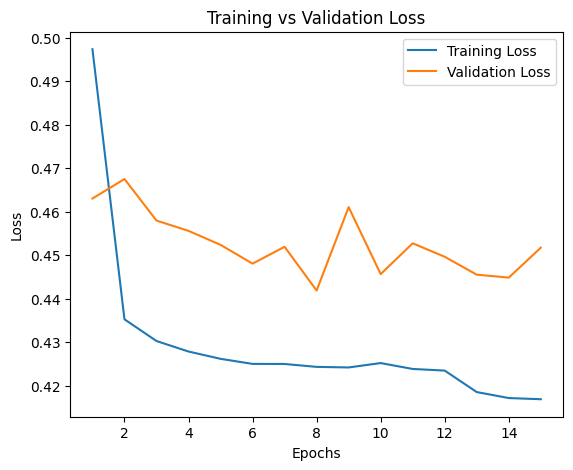

In [42]:
# Extract history data
history = history_elig.history
epochs = range(1, len(history['loss']) + 1)

# Plot loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], label='Training Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

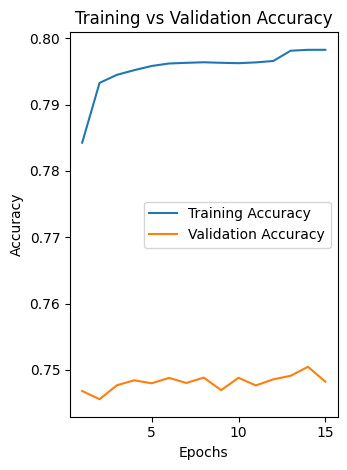

In [43]:
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [45]:
# --- Model 1: Logistic Regression ---
logreg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg_model.fit(X_res_scaled, y_res)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [46]:
# Predictions on test data
y_pred_logreg = logreg_model.predict(X_test_elig_scaled)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_elig_scaled)[:, 1]  # For ROC AUC

In [47]:
print("\nLogistic Regression Report:")
print(classification_report(y_test_elig, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_elig, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test_elig, y_pred_proba_logreg))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75    219022
           1       0.59      0.71      0.64    130978

    accuracy                           0.71    350000
   macro avg       0.70      0.71      0.70    350000
weighted avg       0.72      0.71      0.71    350000

Confusion Matrix:
 [[154665  64357]
 [ 38203  92775]]
ROC AUC Score: 0.7876240671478284


In [48]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=20, random_state=42, class_weight='balanced')
dt_model.fit(X_res_scaled, y_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=42)

In [49]:
# Predictions on test data
y_pred_dt = dt_model.predict(X_test_elig_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_elig_scaled)[:, 1]  # For ROC AUC

In [50]:
print("\n--- Decision Tree Report ---")
print(classification_report(y_test_elig, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_elig, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test_elig, y_pred_proba_dt))


--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.91      0.65      0.76    219022
           1       0.60      0.89      0.72    130978

    accuracy                           0.74    350000
   macro avg       0.75      0.77      0.74    350000
weighted avg       0.79      0.74      0.74    350000

Confusion Matrix:
 [[141884  77138]
 [ 14649 116329]]
ROC AUC Score: 0.7855516264999092


In [51]:
import joblib

# Save scaler
joblib.dump(scaler_eligibility_check, 'scaler_eligibility.pkl')

# Save label encoders
joblib.dump(eligibility_encoders, 'eligibility_label_encoders.pkl')

# Save model
eligibility_model.save('eligibility_model.h5')


Credit Risk Scoring - ANN

In [52]:
risk_ann_features = [
    'CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration',
    'MonthlyDebtPayments', 'DebtToIncomeRatio', 'PreviousLoanDefaults',
    'BankruptcyHistory', 'InterestRate', 'JobTenure'
]

In [53]:
## data preparation
df_risk_ann = df_loan_predict[risk_ann_features + ['LoanApproved']].copy()
X_risk_ann = df_risk_ann.drop('LoanApproved', axis=1)
y_risk_ann = df_risk_ann['LoanApproved']

In [54]:
# Train-Test Split
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk_ann, y_risk_ann, test_size=0.2, random_state=42)

# Scale features
scaler_risk = StandardScaler()
X_train_risk_scaled = scaler_risk.fit_transform(X_train_risk)
X_test_risk_scaled = scaler_risk.transform(X_test_risk)

In [55]:
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [56]:
## ANN
# Model architecture config

num_columns_risk = X_train_risk_scaled.shape[1]
num_labels_risk = 1
hidden_units_risk = [150, 150, 150]
dropout_rates_risk = [0.3, 0.3, 0.2, 0.1]
learning_rate_risk = 5e-4


In [57]:
def build_risk_ann_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu', kernel_regularizer=l2(0.001))(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    out = Dense(num_labels, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)

    # Compile the refined model
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [58]:
class_weights_risk = dict(enumerate(compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_risk)))

In [59]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Reduce learning rate when the model stops improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

In [60]:
# Build model
risk_ann_model = build_risk_ann_model(num_columns_risk, num_labels_risk, hidden_units_risk, dropout_rates_risk, learning_rate_risk)
risk_ann_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 150)                 │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,941 (191.18 KB)

 Trainable params: 48,021 (187.58 KB)

 Non-trainable params: 920 (3.59 KB)

In [61]:
# Train model
history_risk_ann = risk_ann_model.fit(
    X_train_risk_scaled, y_train_risk,
    validation_split=0.2,
    epochs=30,
    batch_size=125,
    class_weight = class_weights_risk,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.6389 - loss: 0.7571 - val_accuracy: 0.7363 - val_loss: 0.4798 - learning_rate: 5.0000e-04
Epoch 2/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.6599 - loss: 0.5336 - val_accuracy: 0.7361 - val_loss: 0.4887 - learning_rate: 5.0000e-04
Epoch 3/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.6610 - loss: 0.5280 - val_accuracy: 0.7364 - val_loss: 0.4745 - learning_rate: 5.0000e-04
Epoch 4/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6626 - loss: 0.5252 - val_accuracy: 0.7371 - val_loss: 0.4630 - learning_rate: 5.0000e-04
Epoch 5/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.6622 - loss: 0.5246 - val_accuracy: 0.7373 - val_loss: 0.4774 - learning_rate: 5.0000e-04
Epoch 6/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.6626 - loss: 0.5234 - val_accuracy: 0.7369 - val_loss: 0.4627 - learning_rate: 5.0000e-04
Epoch 7/30
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 30s 

In [62]:
# Predict
y_pred_ann_risk = risk_ann_model.predict(X_test_risk_scaled)
y_pred_ann = (y_pred_ann_risk >= 0.3).astype(int)

# Evaluation
print("\n--- Risk of repayment Report ---")
print(classification_report(y_test_risk, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test_risk, y_pred_ann))
print("ROC AUC Score:", roc_auc_score(y_test_risk, y_pred_ann_risk))

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step

--- Risk of repayment Report ---
              precision    recall  f1-score   support

           0       1.00      0.56      0.72    125418
           1       0.57      1.00      0.73     74582

    accuracy                           0.72    200000
   macro avg       0.79      0.78      0.72    200000
weighted avg       0.84      0.72      0.72    200000

Confusion Matrix:
 [[69914 55504]
 [    0 74582]]
ROC AUC Score: 0.7995783749940659


In [63]:
import matplotlib.pyplot as plt

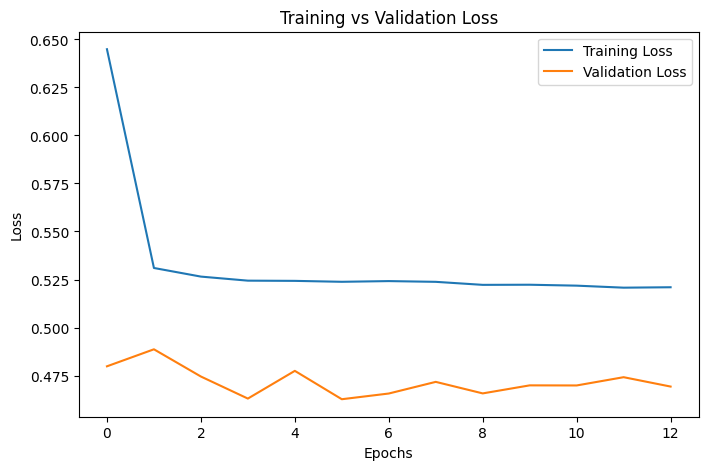

In [64]:
## Training vs Validation Loss & AUC
# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history_risk_ann.history['loss'], label='Training Loss')
plt.plot(history_risk_ann.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import numpy as np

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


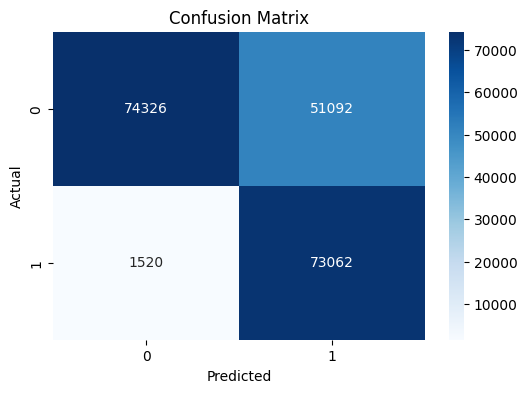

In [67]:
# Predictions
y_pred_risk_prob = risk_ann_model.predict(X_test_risk_scaled)
y_pred_risk = (y_pred_risk_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_risk, y_pred_risk)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.59      0.74    125418
           1       0.59      0.98      0.74     74582

    accuracy                           0.74    200000
   macro avg       0.78      0.79      0.74    200000
weighted avg       0.83      0.74      0.74    200000



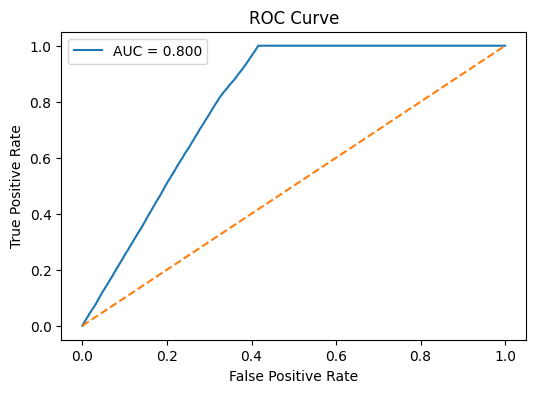

In [68]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_risk, y_pred_risk))

# --- ROC Curve
fpr, tpr, _ = roc_curve(y_test_risk, y_pred_risk_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_risk, y_pred_risk_prob):.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Fraud Detection → Autoencoder

In [69]:
## features for fraud detection
fraud_features = [
    'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
    'DebtToIncomeRatio', 'InterestRate', 'Age', 'JobTenure',
    'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
    'BankruptcyHistory', 'PreviousLoanDefaults', 'MonthlySavings',
    'MonthlyHousingCosts', 'EducationLevel', 'EmployerType'
]

In [70]:
## Extract and pre-process features

df_fraud = df_loan_predict[fraud_features].copy()

# Encode categorical features
fraud_encoders = {}
for col in ['EducationLevel', 'EmployerType']:
    le = LabelEncoder()
    df_fraud[col] = le.fit_transform(df_fraud[col])
    fraud_encoders[col] = le

# Scale features
fraud_scaler = StandardScaler()
df_fraud_scaled = fraud_scaler.fit_transform(df_fraud)


In [76]:
## Build autoencoder model
input_dim = df_fraud_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(12, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_absolute_error')
autoencoder.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624 (2.44 KB)

 Trainable params: 624 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
## Training model
history_fraud = autoencoder.fit(
    df_fraud_scaled, df_fraud_scaled,
    epochs=30,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6058 - val_loss: 0.4605
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4596 - val_loss: 0.4585
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4586 - val_loss: 0.4580
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4576 - val_loss: 0.4573
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.4566 - val_loss: 0.4523
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.4446 - val_loss: 0.4217
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4122 - val_loss: 0.4035
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4026 - val_loss: 0.3995
Epoch 9/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3901 - val_loss: 0.3561
Epoch 10/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3557 - val_loss: 0.3539
Epoch 11/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3538 - val_loss: 0.3547
Epoch 12/30
3125/3125 ━━━━━━━━

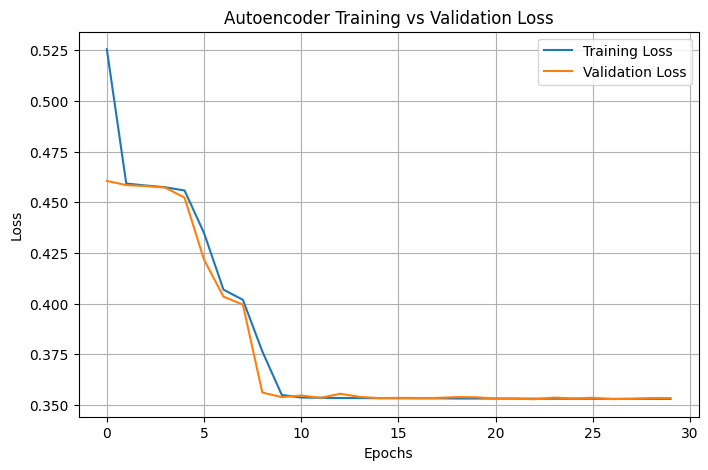

In [78]:
plt.figure(figsize=(8, 5))
plt.plot(history_fraud.history['loss'], label='Training Loss')
plt.plot(history_fraud.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# Generate predictions from the autoencoder
df_fraud_pred = autoencoder.predict(df_fraud_scaled)

# Calculate reconstruction errors using MAE
reconstruction_errors = np.mean(np.abs(df_fraud_pred - df_fraud_scaled), axis=1)

# Define threshold (e.g., 95th percentile for anomaly detection)
threshold = np.percentile(reconstruction_errors, 95)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step


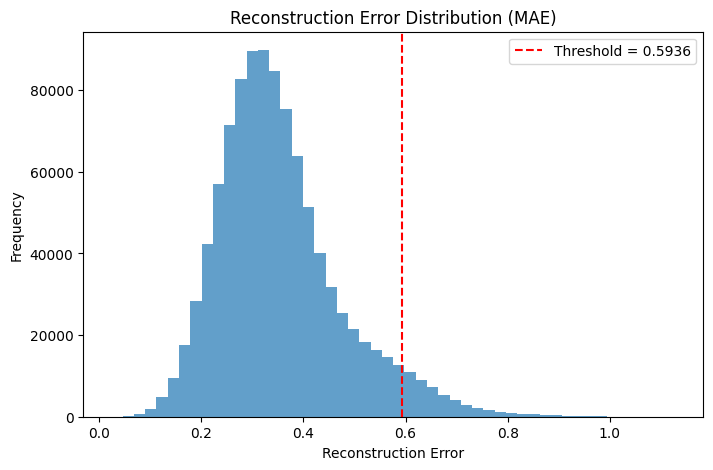

In [84]:
# Visualize reconstruction error distribution
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title("Reconstruction Error Distribution (MAE)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [85]:
import numpy as np

# Get reconstructions
reconstructions = autoencoder.predict(df_fraud_scaled)
reconstruction_errors = np.mean(np.square(df_fraud_scaled - reconstructions), axis=1)

# Set threshold at 95th percentile
threshold = np.percentile(reconstruction_errors, 95)
predicted_labels = (reconstruction_errors > threshold).astype(int)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 30s 944us/step


Repayment Risk → XGBoost

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Feature list (including your custom ones)
repayment_features = [
    'CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration',
    'MonthlyDebtPayments', 'DebtToIncomeRatio', 'PreviousLoanDefaults',
    'BankruptcyHistory', 'InterestRate', 'JobTenure',
    'EmploymentStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
    'RentPayments'
]

In [88]:
# Extract features and target
df_repay = df_loan_predict[repayment_features + ['LoanApproved']].copy()

In [89]:
# Encode categorical features
repayment_encoders = {}
for col in ['EmploymentStatus', 'HomeOwnershipStatus']:
    le = LabelEncoder()
    df_repay[col] = le.fit_transform(df_repay[col])
    repayment_encoders[col] = le

In [90]:
# Split features and target
X_repay = df_repay.drop('LoanApproved', axis=1)
y_repay = df_repay['LoanApproved']

X_train_repay, X_test_repay, y_train_repay, y_test_repay = train_test_split(X_repay, y_repay, test_size=0.2, random_state=42)

# Train XGBoost
xgb_repay_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_repay_model.fit(X_train_repay, y_train_repay)
repayment_risk_features = list(X_repay.columns)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [91]:
# Predictions & Evaluation
y_pred_repay = xgb_repay_model.predict(X_test_repay)
y_pred_repay_prob = xgb_repay_model.predict_proba(X_test_repay)[:, 1]

In [92]:
print("\nClassification Report:")
print(classification_report(y_test_repay, y_pred_repay))
print("ROC AUC Score:", roc_auc_score(y_test_repay, y_pred_repay_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    125418
           1       0.60      0.99      0.75     74582

    accuracy                           0.75    200000
   macro avg       0.79      0.80      0.75    200000
weighted avg       0.84      0.75      0.75    200000

ROC AUC Score: 0.801417624292341


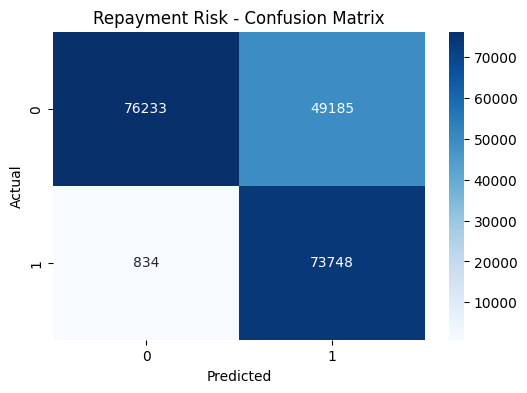

In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test_repay, y_pred_repay)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Repayment Risk - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Rule-Based

In [94]:
def recommend_loan(user):
    recommendation = {}

    # Base loan amount logic
    income = user['income']
    credit = user['CreditScore']
    tenure = user['JobTenure']
    purpose = user['LoanPurpose'].lower()
    dti = user['DebtToIncomeRatio']

    # Max loan amount estimation (conservative logic)
    if purpose == 'home':
        max_amount = income * 100
        term = 360
        base_rate = 6.0
    elif purpose == 'auto':
        max_amount = income * 30
        term = 60
        base_rate = 7.5
    elif purpose == 'education':
        max_amount = income * 40
        term = 120
        base_rate = 6.5
    else:  # personal or others
        max_amount = income * 10
        term = 24
        base_rate = 12.0

    # Adjust interest rate by credit score
    if credit >= 800:
        rate = base_rate - 0.5
    elif credit >= 700:
        rate = base_rate
    elif credit >= 600:
        rate = base_rate + 1.5
    else:
        rate = base_rate + 3.0

    # Debt-to-Income based restriction
    if dti > 0.45:
        max_amount *= 0.5
        recommendation['Note'] = 'High DTI: Recommended loan amount reduced.'

    # Employment filter
    if tenure < 12:
        max_amount *= 0.75
        recommendation['Note'] = recommendation.get('Note', '') + ' Short job history: Lower recommended amount.'

    recommendation['Recommended Loan Amount'] = round(max_amount, 2)
    recommendation['Recommended Term (months)'] = term
    recommendation['Estimated Interest Rate (%)'] = round(rate, 2)
    recommendation['Loan Purpose'] = purpose.title()

    return recommendation

SHAP-based Explanation

In [95]:
import shap
import numpy as np

In [96]:
# Subset a few rows from training set for background
X_background = X_train_elig[:100]

# Create explainer for the Neural Network
explainer = shap.Explainer(eligibility_model, X_background)


In [97]:
# Explain a sample prediction (e.g., first test sample)
shap_values = explainer(X_test_elig[:1])

# Visualize local explanation for one prediction
shap.plots.waterfall(shap_values[0], max_display=10)

PermutationExplainer explainer: 101it [00:46,  1.77it/s]


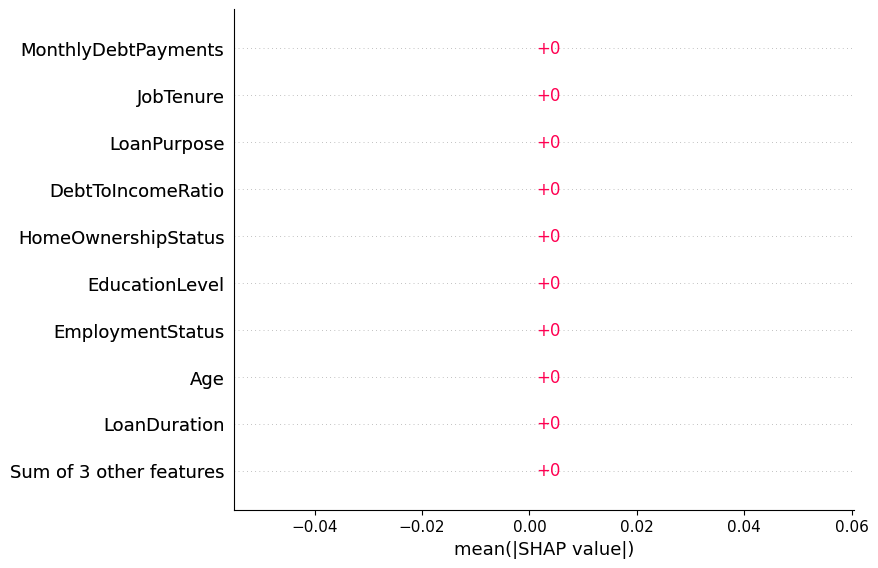

In [98]:
# Use a few test examples for global overview
shap_values_all = explainer(X_test_elig[:100])
shap.plots.bar(shap_values_all)

Wraping up

In [100]:
model_feature_map = {
    'ann': [
        'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose',
        'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
        'mort_acc', 'pub_rec_bankruptcies'
    ],
    'fraud': [
        'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
        'DebtToIncomeRatio', 'InterestRate', 'Age', 'JobTenure',
        'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
        'BankruptcyHistory', 'PreviousLoanDefaults', 'MonthlySavings',
        'MonthlyHousingCosts', 'EducationLevel', 'EmployerType'
    ]
}

In [103]:
# Define columns after training to ensure input consistency
eligibility_model_columns = pd.get_dummies(pd.DataFrame(X_train_elig)).columns.tolist()

In [101]:
def run_loan_pipeline(user_input):
    results = {}

    # --- Rule-based Loan Rejection for Extreme Case ---
    if user_input['LoanAmount'] > user_input['MonthlyIncome'] * 12:
        results['Loan Eligibility'] = "Rejected"
        results['Credit Risk Score'] = "Too High"
        results['Fraud Check'] = "High Loan-to-Income"
        results['Top Risk Factor'] = "Loan Amount vs Income"
        return results

    # --- Default profile fallback ---
    default_profile = {
        'AnnualIncome': user_input['MonthlyIncome'] * 12,
        'LoanDuration': user_input['LoanDuration'],
        'LoanAmount': user_input['LoanAmount'],
        'CreditScore': user_input['CreditScore'],
        'EmploymentStatus': user_input['EmploymentStatus'],
        'JobTenure': user_input['JobTenure'],
        'LoanPurpose': user_input['LoanPurpose'],
        'MonthlyDebtPayments': user_input['MonthlyDebtPayments'],
        'DebtToIncomeRatio': user_input['MonthlyDebtPayments'] / max(user_input['MonthlyIncome'], 1),
        'InterestRate': 5.5,
        'Age': 18,
        'EducationLevel': 'Bachelor',
        'EmployerType': 'Private',
        'NumberOfOpenCreditLines': 5,
        'NumberOfCreditInquiries': 2,
        'BankruptcyHistory': 0,
        'PreviousLoanDefaults': 0,
        'MonthlySavings': 500,
        'MonthlyHousingCosts': 1200,
        'NumberOfDependents': 0,
        'HomeOwnershipStatus': 'Rent',
        'RentPayments': 800
    }

    full_input = {**default_profile, **user_input}

    # --- Loan Eligibility ---
    eligibility_df = pd.DataFrame([full_input])
    eligibility_df_encoded = pd.get_dummies(eligibility_df)
    eligibility_df_encoded = eligibility_df_encoded.reindex(columns=eligibility_model_columns, fill_value=0)
    eligibility_scaled = scaler_eligibility_check.transform(eligibility_df_encoded)
    nn_pred = eligibility_model.predict(eligibility_scaled)[0][0]
    results['Loan Eligibility'] = 'Approved' if nn_pred > 0.5 else 'Rejected'

    # --- Credit Risk ANN ---
    ann_keys = model_feature_map['ann']
    ann_features = pd.DataFrame([{k: full_input[k] for k in risk_ann_features}])
    ##ann_features = pd.DataFrame([{k: full_input.get(k, 0) for k in ann_keys}])
    ann_scaled = scaler_risk.transform(ann_features)
    ann_pred = risk_ann_model.predict(ann_scaled)[0][0]
    results['Credit Risk Score'] = round(float(ann_pred), 2)

    # --- Encode user input for fraud detection ---
    for col in ['EducationLevel', 'EmployerType']:
        if col in full_input:
            original_value = str(full_input[col])  # ensure it's a Python string
            if original_value in fraud_encoders[col].classes_:
                full_input[col] = fraud_encoders[col].transform([original_value])[0]
            else:
            # handle unseen label by setting a default or most common label
                full_input[col] = 0  # or use np.argmax(np.bincount(...)) if needed

    for col in ['EmploymentStatus', 'HomeOwnershipStatus']:
        if col in full_input:
            original_value = str(full_input[col])
            if original_value in repayment_encoders[col].classes_:
                full_input[col] = repayment_encoders[col].transform([original_value])[0]
            else:
                full_input[col] = 0

    # --- Autoencoder Fraud Detection ---
    fraud_keys = model_feature_map['fraud']
    fraud_features = pd.DataFrame([{k: full_input[k] for k in fraud_keys if k in full_input}])
    fraud_scaled = fraud_scaler.transform(fraud_features)
    fraud_recon = autoencoder.predict(fraud_scaled)
    recon_error = np.mean(np.square(fraud_scaled - fraud_recon), axis=1)
    threshold = np.percentile(recon_error, 95)
    results['Fraud Check'] = 'Anomaly' if recon_error[0] > threshold else 'Normal'

    # --- Repayment Risk via XGBoost ---
    risk_features = pd.DataFrame([{k: full_input[k] for k in repayment_risk_features if k in full_input}])
    #risk_scaled = risk_scaler.transform(risk_features)
    risk_pred = xgb_repay_model.predict_proba(risk_features)[0][1]
    results['Repayment Risk'] = round(risk_pred, 2)

    # --- SHAP Explanation ---
    shap_exp = shap.Explainer(eligibility_model,  X_train_elig[:100])
    shap_vals = shap_exp(eligibility_scaled)
    top_feature = eligibility_df_encoded.columns[np.argmax(np.abs(shap_vals.values[0]))]
    results['Top Risk Factor'] = top_feature

    return results

In [116]:
# --- User Input Section ---
print("\nWelcome to Loan Eligibility Advisor (Multimodal AI System)")
user_inputs = {
    "MonthlyIncome": float(input("Enter your monthly income: ")),
    "LoanAmount": float(input("Enter requested loan amount: ")),
    "LoanDuration": int(input("Enter loan term in months: ")),
    "CreditScore": int(input("Enter your credit score (300-850): ")),
    "EmploymentStatus": input("Enter your employment status (Employed, Unemployed, Self-Employed): "),
    "JobTenure": int(input("Enter your employment tenure in months: ")),
    "LoanPurpose": input("Enter loan purpose (Home, Auto, Education, Personal, etc.): "),
    "MonthlyDebtPayments": float(input("Enter your monthly debt payments: "))
}

print("\nProcessing your application...")
prediction_results = run_loan_pipeline(user_inputs)
print("\n--- Loan Eligibility Report ---")
for k, v in prediction_results.items():
    print(f"{k}: {v}")



Welcome to Loan Eligibility Advisor (Multimodal AI System)
Enter your monthly income: 4500
Enter requested loan amount: 15000
Enter loan term in months: 24
Enter your credit score (300-850): 650
Enter your employment status (Employed, Unemployed, Self-Employed): Employed
Enter your employment tenure in months: 36
Enter loan purpose (Home, Auto, Education, Personal, etc.): Personal
Enter your monthly debt payments: 0

Processing your application...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

--- Loan Eligibility Report ---
Loan Eligibility: Approved
Credit Risk Score: 0.69
Fraud Check: Normal
Repayment Risk: 0.49000000953674316
Top Risk Factor: AnnualIncome


Integrate with OPEN AI api for friendly chat

In [105]:
import openai
from openai import OpenAI

In [106]:
from getpass import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass("OpenAI ")

OpenAI ··········


In [114]:
from openai import OpenAI

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def explain_decision_with_gpt(report_dict):
    summary = "\n".join([f"{k}: {v}" for k, v in report_dict.items()])
    prompt = f"""
    Based on the following loan application assessment:

    {summary}

    Write a short explanation to the applicant about why the result was given and what they can do next.
    Explain you need to
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a financial assistant helping users understand loan outcomes. Explain friendly manner with the Credit Risk Score and Repayment Risk in percentage number. Then explain why Top Risk Factor with proper English as well.  "},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=200
    )

    return response.choices[0].message.content

In [118]:
print("\n--- Your Friendly Loan Eligibility Test ^_^ ---")
explanation = explain_decision_with_gpt(prediction_results)
print(explanation)


--- Your Friendly Loan Eligibility Test ^_^ ---
Hello!

Thank you for your loan application, and I’m pleased to inform you that your loan eligibility has been approved! 

Your **Credit Risk Score** is 0.69, which indicates a good level of creditworthiness. This score reflects how likely you are to repay the loan based on your credit history and current financial situation. A score closer to 1.0 is generally more favorable, so you're doing quite well!

However, it's important to note that your **Repayment Risk** is approximately 49%. This percentage suggests a moderate risk regarding your ability to repay the loan. While this isn't alarming, it does indicate that there are some factors that could potentially affect your repayment.

The **Top Risk Factor** identified in your assessment is **Annual Income**. This means that your current income level may be a concern when it comes to comfortably managing loan payments. It's essential to ensure that your income can support not just the loa

In [119]:
!pip install python-dotenv --quiet

In [ ]:
import dotenv
import os
dotenv.load_dotenv(
        os.path.join('/content/drive/MyDrive/vscode-ssh', '.env')
    )
password = os.getenv('PASSWORD')
github_access_token = os.getenv('GITHUB_ACCESS_TOKEN')